# Tree-based Model tuning

The dataset chosen is the [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

It contains the following Attributes:

1) `id` Useless for stroke prediction
2) `gender` Categorical ("Male", "Female", "Other")
3) `age` Continuous
4) `hypertension` Categorical Yes/No
5) `heart_disease` Categorical Yes/No
6) `ever_married` Categorical Yes/No
7) `work_type` Categorica ("children", "Govt_jov", "Never_worked", "Private" or "Self-employed")
8) `Residence_type` Categorical ("Rural", "Urban")
9) `avg_glucose_level` Continuous
10) `bmi` Continuous
11) `smoking_status` Categorical ("formerly smoked", "never smoked", "smokes" or "Unknown")

12) `stroke` Target variable

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("../data/healthcare-dataset-stroke-data.csv")

In [4]:
df.shape

(5110, 12)

In [5]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
# Rename the columns so they're all snake_case
df = df.rename(columns=str.lower)

Dataset shape looks alright, but there are some NaNs in there. Let's see how many

In [8]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

So, 201 entries here don't have a BMI. It seems OK to drop those rows, but maybe drop the whole column if the predictive power here is too small?

Let's separate the columns into their types

In [9]:
categorical_columns = [
    "gender",
    "hypertension",
    "heart_disease",
    "ever_married",
    "work_type",
    "residence_type",
    "smoking_status",
]

numeric_columns = ["age", "avg_glucose_level", "bmi"]

target_column = "stroke"

all_columns = numeric_columns + categorical_columns + [target_column]

df = df[all_columns]

In [10]:
df.dtypes

age                  float64
avg_glucose_level    float64
bmi                  float64
gender                object
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
smoking_status        object
stroke                 int64
dtype: object

In [11]:
# Let's mark the categorical outputs as such in pandas

In [12]:
df = df.assign(
    gender=lambda x: pd.Categorical(x["gender"]),
    hypertension=lambda x: pd.Categorical(x["hypertension"]),
    heart_disease=lambda x: pd.Categorical(x["heart_disease"]),
    ever_married=lambda x: pd.Categorical(x["ever_married"]),
    work_type=lambda x: pd.Categorical(x["work_type"]),
    residence_type=lambda x: pd.Categorical(x["residence_type"]),
    smoking_status=lambda x: pd.Categorical(x["smoking_status"]),
)
df.dtypes

age                   float64
avg_glucose_level     float64
bmi                   float64
gender               category
hypertension         category
heart_disease        category
ever_married         category
work_type            category
residence_type       category
smoking_status       category
stroke                  int64
dtype: object

In [13]:
# Let's look at the model value counts for all the categorical columns

for column in categorical_columns:
    print(f"{df[column].value_counts()}\n")
    
# And the 5-value summary for the numeric columns

for column in numeric_columns:
    print(f"{df[column].describe()}\n")

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

0    4612
1     498
Name: hypertension, dtype: int64

0    4834
1     276
Name: heart_disease, dtype: int64

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Urban    2596
Rural    2514
Name: residence_type, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

count    4909.00000

In [14]:
df[df.work_type=="Never_worked"]['stroke'].value_counts()

0    22
Name: stroke, dtype: int64

In [15]:
df[target_column].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

This is an imbalanced dataset. Which needs to be taken into account. In particular, it makes Accuracy a poor metric choice. So I will be using the F1 Score for evaluating model performance 

In [16]:
# Remove the nans before proceeding
df = df.dropna(subset=['bmi'])

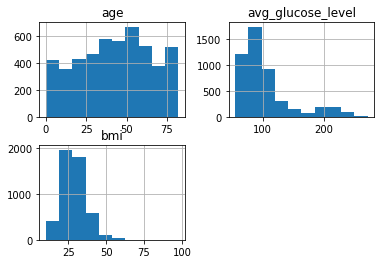

In [17]:
_ = df.hist(column=numeric_columns)

The data in bmi and avg_glucose_level are skewed left

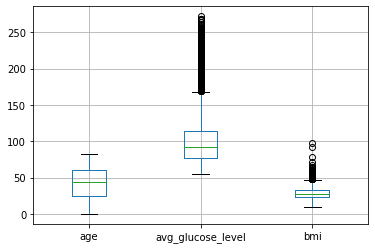

In [18]:
_ = df.boxplot(column=numeric_columns)

`bmi` and `avg_glocose_level` have long tails, and all 3 numeric columns have vastly different scales. In other models I would consider normalizing them, but is that required in Tree-based models?

<AxesSubplot:>

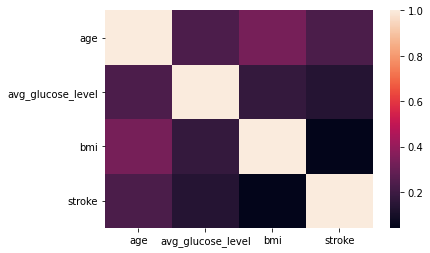

In [19]:
import seaborn as sns


sns.heatmap(df.corr())

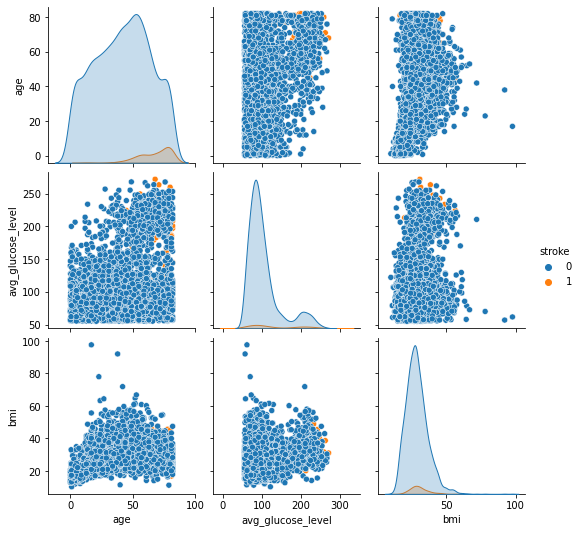

In [20]:
sns.pairplot(data=df, vars=numeric_columns, hue=target_column)

No features are highly corellated


The only relationship I can notice here is that risk of stroke increases with age.


## Simple Decision Tree

In [64]:
from sklearn.preprocessing import OneHotEncoder

categorical_processor = OneHotEncoder(handle_unknown="ignore")

In [74]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_processor, categorical_columns),
])

In [75]:
x, y = df[numeric_columns + categorical_columns], df[target_column]

In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline


tree = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])


tree.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'residence_type',
                                                   'smoking_status'])])),
                ('classifier', DecisionTreeClassifier())])

In [83]:
from sklearn.metrics import f1_score

def print_metric(model, x, y):
    y_pred = model.predict(x)
    print(f"{f1_score(y, y_pred)}")

In [94]:
print("Train F1 score:")
print_metric(tree, x_train, y_train)

print("Test F1 score:")
print_metric(tree, x_test, y_test)

Train F1 score:
0.16091954022988503
Test F1 score:
0.03225806451612903


Let's see how this tree looks

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(tree.named_steps['classifier'], ax=ax)